In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/home/rostya/projects/python/github/ai/Machine-Learning-Data-Science/UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V7/08-Linear-Regression-Models/Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


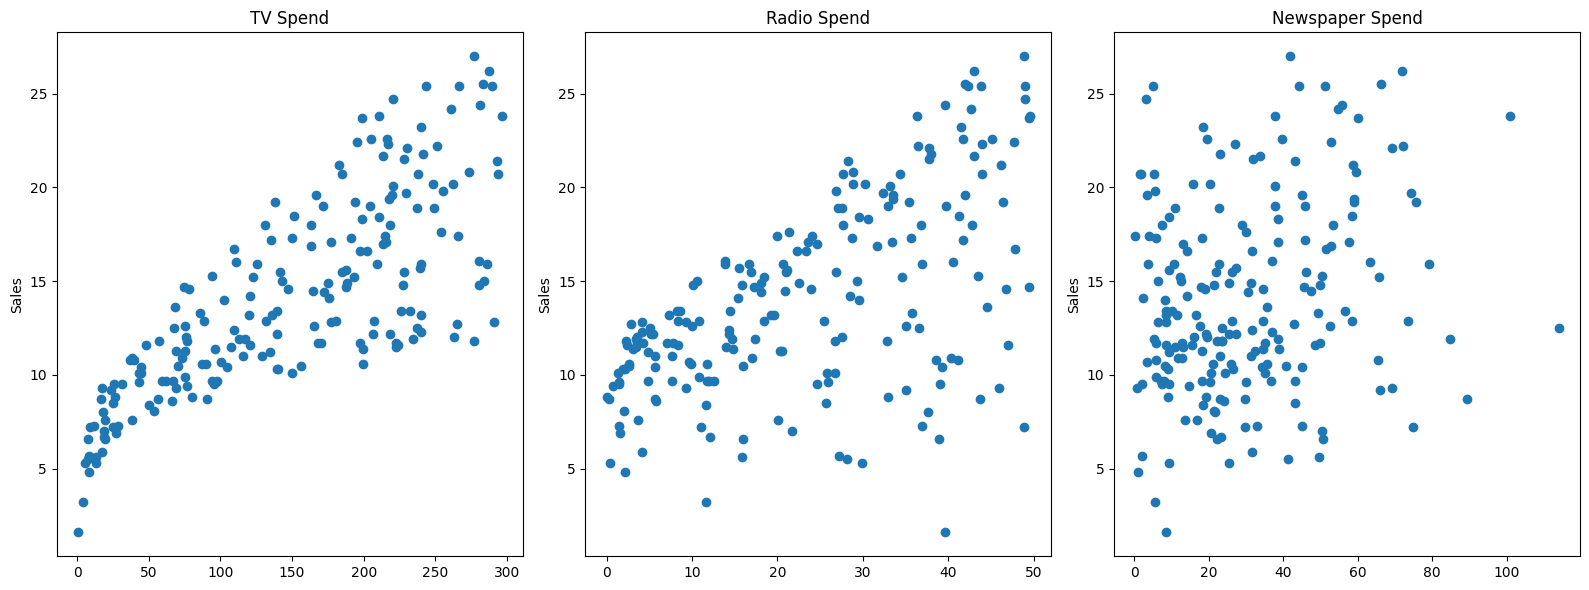

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

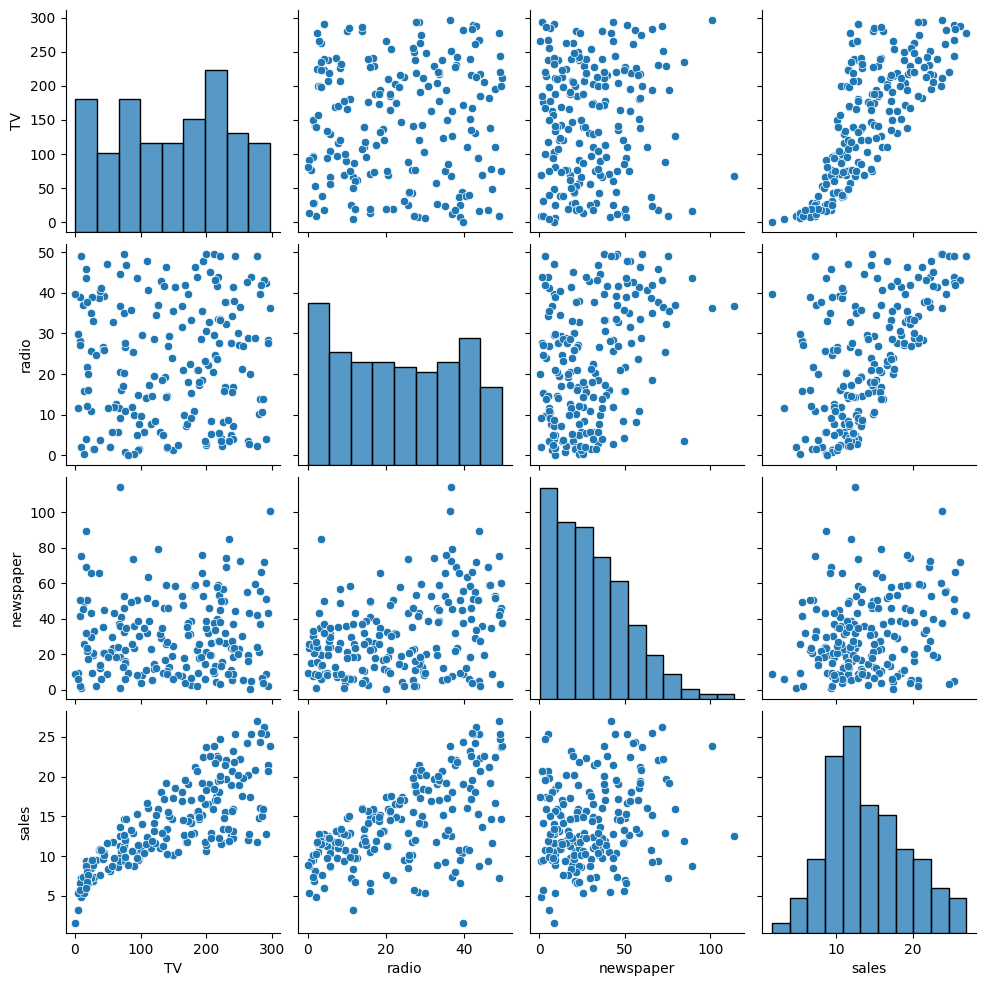

In [6]:
sns.pairplot(df)

In [7]:
X = df.drop('sales', axis=1)  # Remove axis

In [8]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
y = df['sales']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train, X_test, y_train, y_test

(        TV  radio  newspaper
 169  284.3   10.6        6.4
 97   184.9   21.0       22.0
 31   112.9   17.4       38.6
 12    23.8   35.1       65.9
 35   290.7    4.1        8.5
 ..     ...    ...        ...
 106   25.0   11.0       29.7
 14   204.1   32.9       46.0
 92   217.7   33.5       59.0
 179  165.6   10.0       17.6
 102  280.2   10.1       21.4
 
 [140 rows x 3 columns],
         TV  radio  newspaper
 95   163.3   31.6       52.9
 15   195.4   47.7       52.9
 30   292.9   28.3       43.2
 158   11.7   36.9       45.2
 128  220.3   49.0        3.2
 115   75.1   35.0       52.7
 69   216.8   43.9       27.2
 170   50.0   11.6       18.4
 174  222.4    3.4       13.1
 45   175.1   22.5       31.5
 66    31.5   24.6        2.2
 182   56.2    5.7       29.7
 165  234.5    3.4       84.8
 78     5.4   29.9        9.4
 186  139.5    2.1       26.6
 177  170.2    7.8       35.2
 56     7.3   28.1       41.4
 152  197.6   23.3       14.2
 82    75.3   20.3       32.5
 68   237.4  

In [13]:
len(df)

200

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |      speedu

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
test_predictions = model.predict(X_test)  # y_test

In [19]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: sales, dtype: float64

In [20]:
X_test.head()

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [21]:
test_predictions

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

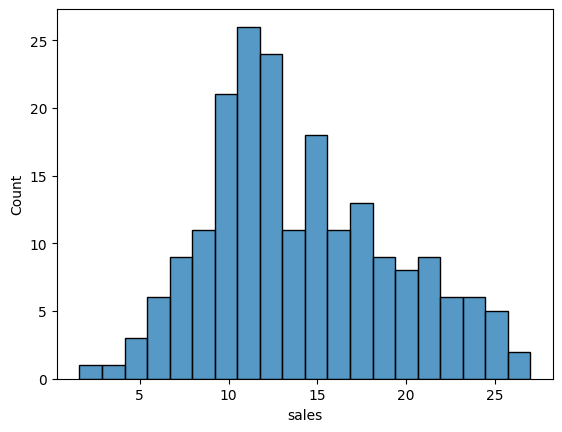

In [24]:
sns.histplot(data=df, x='sales', bins=20)

In [25]:
mean_absolute_error(y_test, test_predictions)

1.5116692224549086

In [26]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.9485372043446387

In [27]:
test_residuals = y_test - test_predictions

In [28]:
test_residuals

95     0.334604
15     1.211772
30    -0.151071
158   -3.589238
128    2.497680
115   -0.755569
69     1.103075
170    1.049715
174   -1.775471
45    -0.224495
66     0.485570
182    2.174572
165   -2.402060
78    -3.670260
186    0.843204
177   -0.304544
56    -3.415494
152    0.443807
82     1.004171
68     0.175264
124   -0.068218
16    -1.274690
148   -1.596389
93     0.664982
65     1.691393
60     2.488020
84     0.782405
67     1.593723
125    1.519234
132   -2.814120
9     -1.576049
18     1.330806
55     1.969910
75    -4.077706
150   -2.001136
104    0.624092
135   -2.662026
137   -0.138265
164    1.060612
76     2.518094
79     1.486676
197    0.395137
38    -0.070454
24     1.609186
122   -1.563884
195    2.375645
29     1.211062
19     0.506693
143    1.709755
86     0.338802
114   -1.118484
173    0.068431
5     -6.153607
126   -4.553147
117    3.063632
73     1.238420
140    1.480429
98     1.144835
172   -0.095191
96    -0.453176
Name: sales, dtype: float64

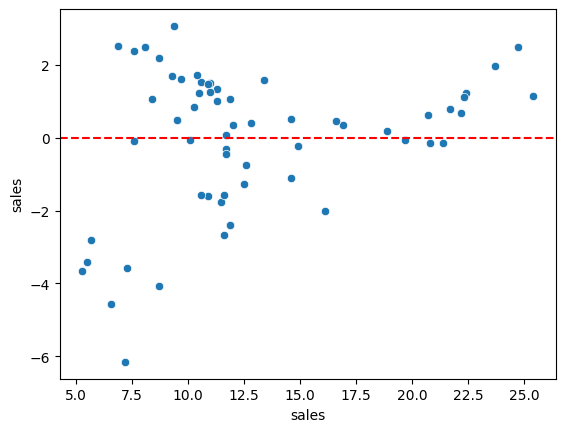

In [29]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

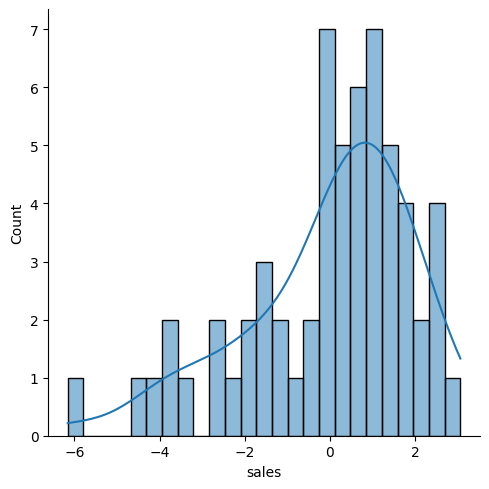

In [30]:
sns.displot(test_residuals, bins=25, kde=True)

In [31]:
import scipy as sp

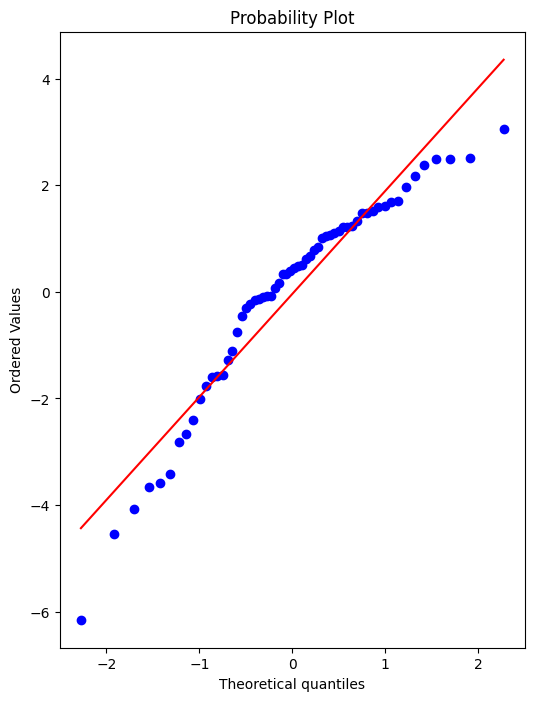

In [32]:
# Создаём объект figure и оси для рисования графика
fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probplot возвращает значения, которые можно использовать при необходимости
# мы хотим просто нарисовать график, поэтому присваиваем эти значения переменной _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [33]:
final_model = LinearRegression()

In [34]:
final_model.fit(X, y)

LinearRegression()

In [35]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [36]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [37]:
y_hat = final_model.predict(X)

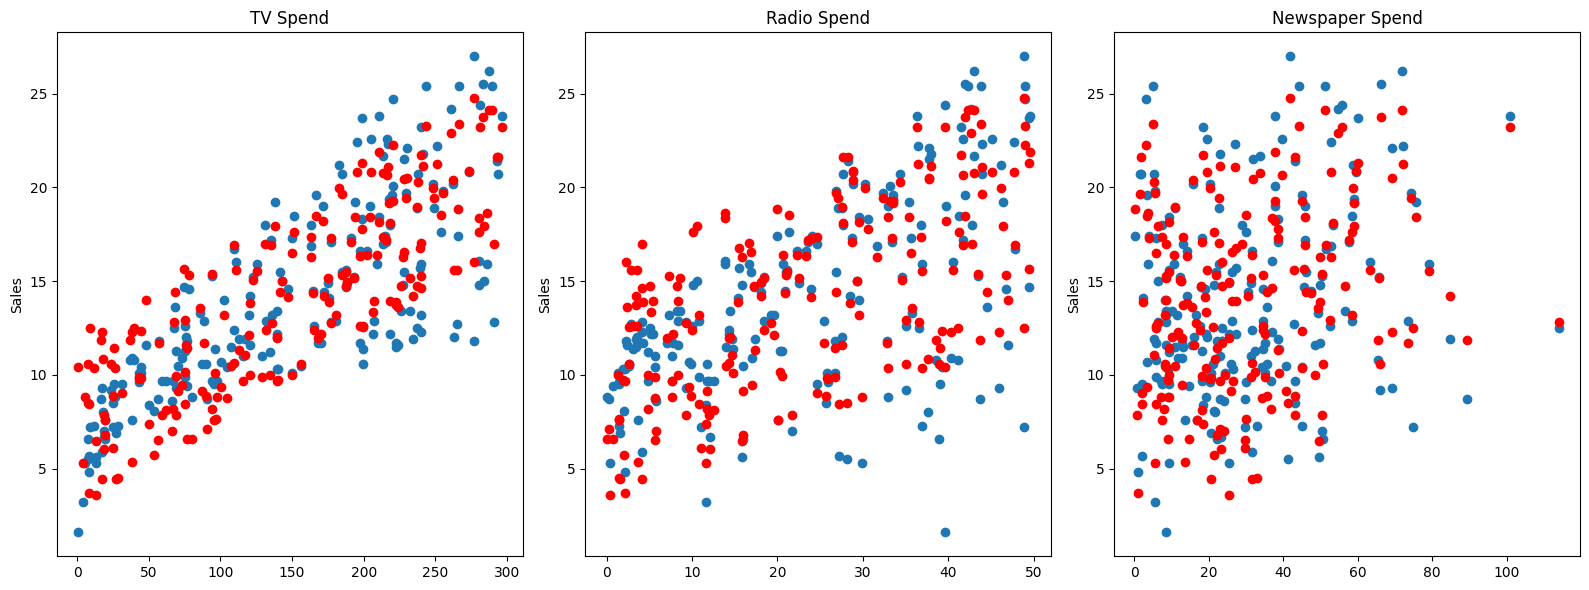

In [38]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [39]:
from joblib import dump, load

In [40]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [41]:
loaded_model = load('final_sales_model.joblib')

In [42]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [43]:
X.shape

(200, 3)

In [44]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales?
campaign = [[149, 22, 12]]

In [45]:
loaded_model.predict(campaign)

/home/rostya/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])